# Week 4: We're gonna code a perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# load our iris data
iris = load_iris()
labels, data = iris.target, iris.data

target_names = iris.target_names

print(target_names)

iris_df = pd.DataFrame(data, columns = iris.feature_names)

['setosa' 'versicolor' 'virginica']


In [2]:
iris_df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
iris_df['label'] = labels
iris_df['label_name'] = [iris.target_names[i] for i in labels]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [62]:
# create a subset with only two types
iris_subset_df = iris_df[iris_df.label_name != 'virginica']
iris_subset_df = iris_subset_df.sample(frac=1)
iris_subset_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_name
60,5.0,2.0,3.5,1.0,1,versicolor
77,6.7,3.0,5.0,1.7,1,versicolor
38,4.4,3.0,1.3,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
21,5.1,3.7,1.5,0.4,0,setosa
...,...,...,...,...,...,...
31,5.4,3.4,1.5,0.4,0,setosa
85,6.0,3.4,4.5,1.6,1,versicolor
39,5.1,3.4,1.5,0.2,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa


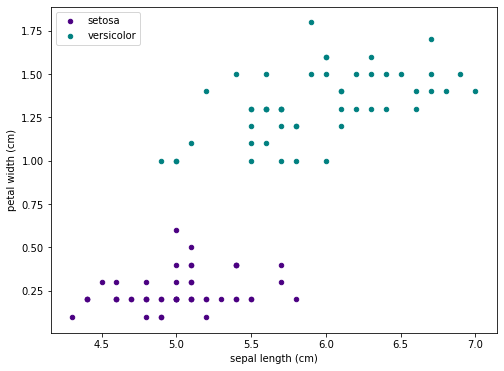

In [63]:
# Plot it just to see what's up

colors = ['indigo', 'teal', 'yellow']

fig, ax = plt.subplots(1, 1, figsize=(8,6))

# These are linearly seperable! look at the graph!
for key, row in iris_subset_df.groupby('label'):
    row.plot.scatter(ax=ax, x='sepal length (cm)', y='petal width (cm)', label=target_names[key], color=colors[key]);

### Writing our perceptron!!!!

In [64]:
# we write it

x = iris_subset_df[['sepal length (cm)', 'petal length (cm)']].values
y = iris_subset_df['label_name'].values
y = np.where(y == 'setosa', -1, 1)

In [65]:
# learning variables

# our learning rate of our perceptron
rate = 0.01

# our number of training iterations
niter = 10

# weights! we need three weight values
weight = np.zeros(1 + x.shape[1])

# keep track of errors
errors = [];

In [66]:
def predict(IN):
    # this is just x2w2 + x1w1 + w0
    net_input = np.dot(IN, weight[1:]) + weight[0]
    activations = 1
    if net_input < 0:
        activations = -1
    # activations = np.where(net_input >= 0.0, 1, -1)
    return activations

In [67]:
# training
for i in range(niter):
    err = 0
    for xi, target in zip(x, y):
        # figuring out how much we are off
        delta_w = rate * (target - predict(xi))
        weight[1:] += delta_w * xi
        weight[0] += delta_w
        err += int(delta_w != 0.0)   
    errors.append(err)
print(errors)

[10, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [68]:
weight

array([-0.04 , -0.088,  0.178])

In [69]:
errors

[10, 0, 0, 0, 0, 0, 0, 0, 0, 0]